# **Machine Problem 5: Object Detection and Recognition using YOLO.**

**0.1 Connect to Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**0.2 Installing Dependencies**

In [2]:
!git clone https://github.com/zzh8829/yolov3-tf2.git

Cloning into 'yolov3-tf2'...
remote: Enumerating objects: 449, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 449 (delta 5), reused 6 (delta 2), pack-reused 433 (from 1)
Receiving objects: 100% (449/449), 4.25 MiB | 9.29 MiB/s, done.
Resolving deltas: 100% (253/253), done.


In [3]:
cd yolov3-tf2

/content/yolov3-tf2


In [4]:
!pip install -r requirements.txt

Obtaining file:///content/yolov3-tf2 (from -r requirements.txt (line 5))
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 53.3 MB/s eta 0:00:00
  Running setup.py develop for yolov3_tf2
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: protobuf
    Found existing installation: protobu

**0.3 Downloading YOLO model weigths and converting to Tensorflow format**

In [5]:
!wget https://pjreddie.com/media/files/yolov3.weights -O data/yolov3.weights
!python convert.py --weights ./data/yolov3.weights --output ./checkpoints/yolov3.tf

--2024-11-04 14:08:02--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘data/yolov3.weights’

data/yolov3.weights 100%[===================>] 236.52M  14.0MB/s    in 24s     

2024-11-04 14:08:27 (9.73 MB/s) - ‘data/yolov3.weights’ saved [248007048/248007048]

2024-11-04 14:08:28.197189: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-04 14:08:28.420891: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; d

**0.4 Importing Libraries**

In [16]:
import time
import cv2
import numpy as np
import tensorflow as tf
from yolov3_tf2.models import YoloV3
from yolov3_tf2.dataset import transform_images
from yolov3_tf2.utils import draw_outputs
from absl import app, flags
import matplotlib.pyplot as plt
import os

### **1.Load YOLO model using tensorflow**

In [7]:
#Parse flags
FLAGS = flags.FLAGS
FLAGS(argv=[''])

#Define parameters
classes_path = './data/coco.names'
weights_path = './checkpoints/yolov3.tf'

#Resize images
size = 416

#Load model and weights
yolo = YoloV3(classes=80)
yolo.load_weights(weights_path).expect_partial()

#Load class names
class_names = [c.strip() for c in open(classes_path).readlines()]

### **2. Image Input**

In [8]:
#Initialize image paths
image_paths = [
    '/content/drive/MyDrive/folder_photos/image_detect1.jpeg',
    '/content/drive/MyDrive/folder_photos/image_detect2.jpeg',
    '/content/drive/MyDrive/folder_photos/image_detect3.jpeg'
]

### **3. Object Detection**

In [9]:
# Specify the single image path
image_path = '/content/drive/MyDrive/folder_photos/image_detect1.jpeg'

# Read and process the image
img_raw = cv2.imread(image_path)
img_raw = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB format

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, size)

# Run inference
t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()

### **4. Visualization**

Time taken for /content/drive/MyDrive/folder_photos/image_detect1.jpeg: 1.4672 seconds
Detections for /content/drive/MyDrive/folder_photos/image_detect1.jpeg:
	mouse, 0.9991506338119507, [0.42341286 0.60078293 0.5272285  0.64956874]
	chair, 0.9971190690994263, [0.05435279 0.3552251  0.4514971  0.9802898 ]
	keyboard, 0.9784226417541504, [0.31694192 0.47223875 0.48410857 0.5838575 ]
	pottedplant, 0.9777042269706726, [0.7146637  0.53443044 0.96591276 0.721088  ]
	tvmonitor, 0.8887370824813843, [0.52351904 0.23571709 0.6935319  0.48939523]
	mouse, 0.5034793615341187, [0.43667156 0.6016037  0.5315483  0.64917916]


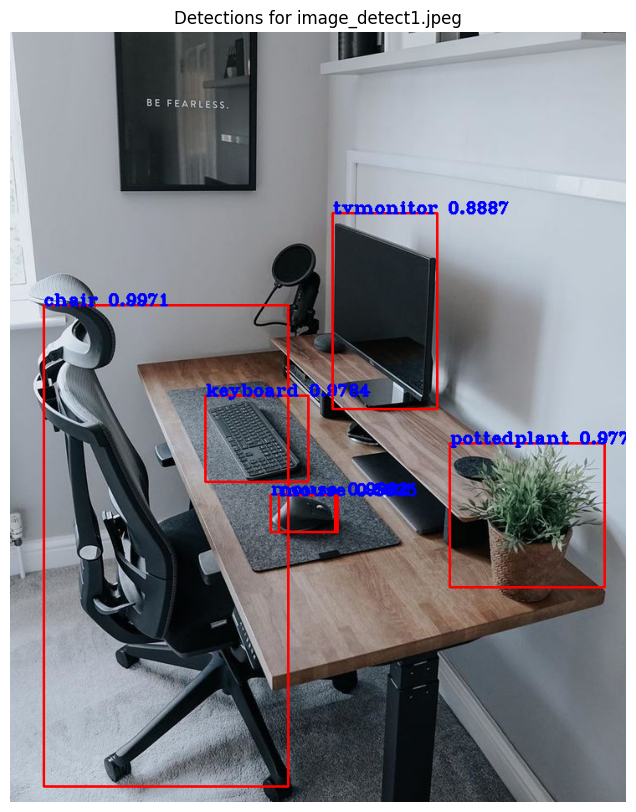

In [10]:
#Print inference time
print(f'Time taken for {image_path}: {t2 - t1:.4f} seconds')

# Display detections
print('Detections for {}:'.format(image_path))
for i in range(nums[0]):
    print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                 np.array(scores[0][i]),
                                 np.array(boxes[0][i])))

# Draw outputs on the image
img_output = draw_outputs(img_raw, (boxes, scores, classes, nums), class_names)

# Display the output using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img_output)
plt.axis('off')  # Hide axes for a cleaner look
plt.title('Detections for {}'.format(image_path.split("/")[-1]))
plt.show()  # Show the image without saving it

### **5. Testing**

Time taken for /content/drive/MyDrive/folder_photos/image_detect1.jpeg: 2.2830 seconds
Detections for /content/drive/MyDrive/folder_photos/image_detect1.jpeg:
	mouse, 0.9991506338119507, [0.42341286 0.60078293 0.5272285  0.64956874]
	chair, 0.9971190690994263, [0.05435279 0.3552251  0.4514971  0.9802898 ]
	keyboard, 0.9784226417541504, [0.31694192 0.47223875 0.48410857 0.5838575 ]
	pottedplant, 0.9777042269706726, [0.7146637  0.53443044 0.96591276 0.721088  ]
	tvmonitor, 0.8887370824813843, [0.52351904 0.23571709 0.6935319  0.48939523]
	mouse, 0.5034793615341187, [0.43667156 0.6016037  0.5315483  0.64917916]


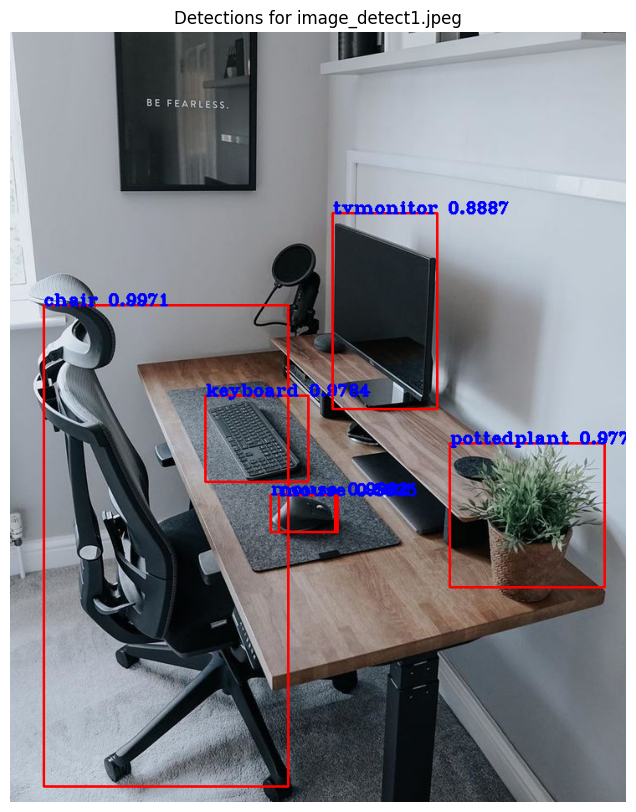

Time taken for /content/drive/MyDrive/folder_photos/image_detect2.jpeg: 1.4801 seconds
Detections for /content/drive/MyDrive/folder_photos/image_detect2.jpeg:
	laptop, 0.9991960525512695, [0.37376654 0.16578662 0.5889896  0.35514253]
	chair, 0.9941763877868652, [0.5108515  0.47642162 0.9190134  0.97986054]
	vase, 0.9581206440925598, [0.52842915 0.14523448 0.58503497 0.2502906 ]


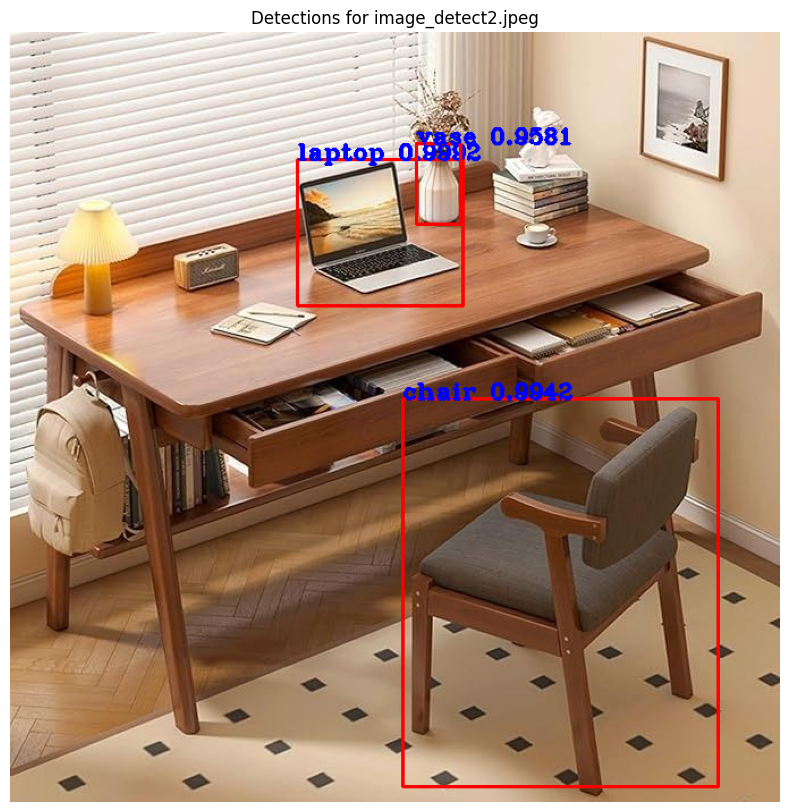

Time taken for /content/drive/MyDrive/folder_photos/image_detect3.jpeg: 1.5003 seconds
Detections for /content/drive/MyDrive/folder_photos/image_detect3.jpeg:
	laptop, 0.9967194199562073, [0.49632955 0.3537556  0.76638544 0.5916336 ]
	person, 0.9493135213851929, [0.01154806 0.6323463  0.41435266 0.98420334]
	keyboard, 0.9302086234092712, [0.03874227 0.6511167  0.28112084 0.72148335]
	tvmonitor, 0.8510646224021912, [0.12177522 0.3434077  0.4761815  0.52539206]
	mouse, 0.7959157824516296, [0.02787489 0.6509019  0.07399537 0.684049  ]
	pottedplant, 0.6410508751869202, [0.86295223 0.24818313 0.99961185 0.3917178 ]


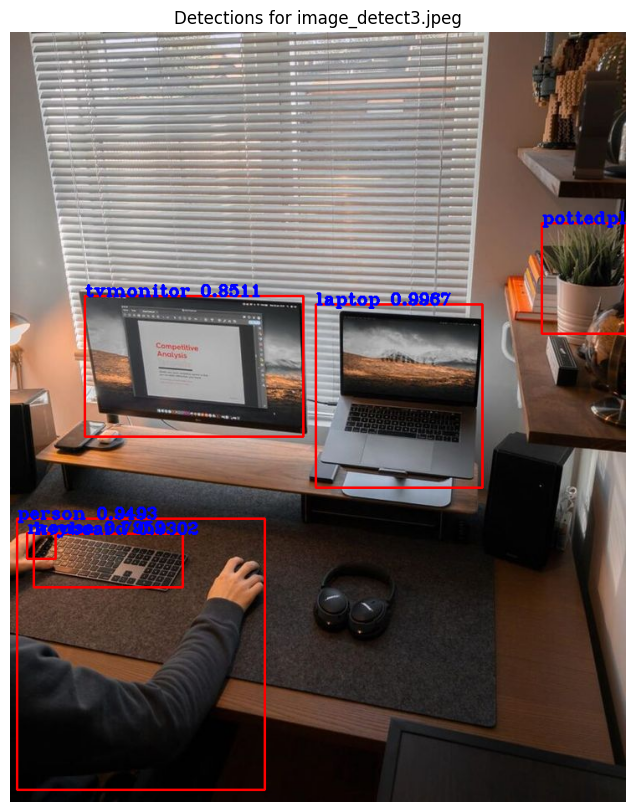

Processed images saved to: content/data


In [17]:
# Define a directory to save output images
output_dir = 'content/data'  # Update this path accordingly
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Process each image for inference
for image_path in image_paths:
    img_raw = cv2.imread(image_path)
    img_raw = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB format

    img = tf.expand_dims(img_raw, 0)
    img = transform_images(img, size)

    # Run inference
    t1 = time.time()
    boxes, scores, classes, nums = yolo(img)
    t2 = time.time()
    print(f'Time taken for {image_path}: {t2 - t1:.4f} seconds')

    # Display detections
    print('Detections for {}:'.format(image_path))
    for i in range(nums[0]):
        print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                     np.array(scores[0][i]),
                                     np.array(boxes[0][i])))

    # Draw outputs on the image
    img_output = draw_outputs(img_raw, (boxes, scores, classes, nums), class_names)

    # Save the output image to the specified directory
    output_image_path = os.path.join(output_dir, os.path.basename(image_path))  # Save with original filename
    cv2.imwrite(output_image_path, cv2.cvtColor(img_output, cv2.COLOR_RGB2BGR))  # Convert back to BGR for saving

    # Display the output using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(img_output)
    plt.axis('off')  # Hide axes
    plt.title(f'Detections for {os.path.basename(image_path)}')
    plt.show()  # Show the image without saving it

print(f'Processed images saved to: {output_dir}')

### **6. Performance Analysis**

The inference time of yolo detection is averaging in 1.5 seconds while the accuracy is quite promising considering the confidence score is alway above 90.

This capability of yolos singles pass detection is quite impressive, this can be impactful for real time object detection when response is crucial for a better performance output.